In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.9283 - acc: 0.3057 - val_loss: 1.8139 - val_acc: 0.3484
Epoch 2/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.7025 - acc: 0.3889 - val_loss: 1.6708 - val_acc: 0.4076
Epoch 3/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.6154 - acc: 0.4224 - val_loss: 1.5818 - val_acc: 0.4367
Epoch 4/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.5557 - acc: 0.4416 - val_loss: 1.5493 - val_acc: 0.4482
Epoch 5/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.5028 - acc: 0.4648 - val_loss: 1.5291 - val_acc: 0.4544
Epoch 6/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.4626 - acc: 0.4768 - val_loss: 1.4678 - val_acc: 0.4737
Epoch 7/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.4383 - acc: 0.4892 - val_loss: 1.4663 -

50000/50000 [==============================] - 3s 67us/step - loss: 0.5371 - acc: 0.8066 - val_loss: 1.9961 - val_acc: 0.5117
Epoch 60/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.5166 - acc: 0.8142 - val_loss: 1.9762 - val_acc: 0.5104
Epoch 61/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.5058 - acc: 0.8192 - val_loss: 2.1334 - val_acc: 0.5119
Epoch 62/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.5172 - acc: 0.8150 - val_loss: 2.1084 - val_acc: 0.5143
Epoch 63/100
50000/50000 [==============================] - 4s 72us/step - loss: 0.5006 - acc: 0.8205 - val_loss: 2.0928 - val_acc: 0.5114
Epoch 64/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.4852 - acc: 0.8264 - val_loss: 2.1182 - val_acc: 0.5141
Epoch 65/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.4787 - acc: 0.8278 - val_loss: 2.1281 - val_acc: 0.5172
Epoch 66/100
50000/50000 [==============

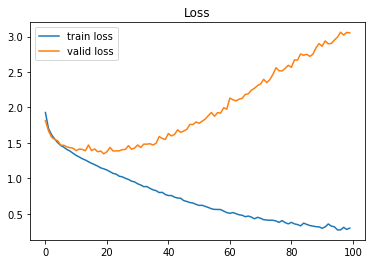

In [10]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

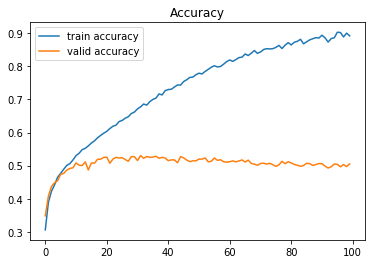

In [9]:
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢